# Fluxonium Design with 6 single qubits NEW-SIMPLE look

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
#from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
#from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround

#from qiskit_metal.renderers.renderer_gds.gds_renderer import QGDSRenderer
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
from qiskit_metal.analyses.quantization import LOManalysis

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis
#from qiskit_metal.analyses.quantization import EPRanalysis


In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d


gui = MetalGUI(design)

In [3]:
#Just keep it here, do NOT use
#Setup the launchpad1 location and orientation
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-3.99mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-3.99mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)


from collections import OrderedDict
jogs_in = OrderedDict()
jogs_in[0] = ["L", '8150um']
jogs_in[1] = ["R", '300um']
jogs_in[2] = ["R", '8150um']



Transmission_Line = {'pin_inputs':
           {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '3919um', 'end_straight': '3915um',
                     'start_jogged_extension': jogs_in,
                    }, 
                    'total_length': '8mm', 'fillet': "110um"
            }

TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tab

In [4]:
## Q1 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-2.66mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-1.33mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)


## Q2 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='0.0mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='+1.33mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)


## Q3 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='2.66mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='3.99mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='3.99mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='2.66mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)


## Q5 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='1.33mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB5', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-0.00mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL5', options = launch_options)


## Q6 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-1.33mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB6', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-2.66mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL6', options = launch_options)


gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.t

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [25]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

# Q1 details
options = dict(chip='main',
    orientation =90, pos_x = '-1.8mm', pos_y = '-1.8mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='150um',
                               ),        
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-10um',
                            ), 
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um',  
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
        gds_cell_name ='FakeJunction_01',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

# Q6 details
options = dict(chip='main',
    orientation =90, pos_x = '2.0mm', pos_y = '-2.0mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='150um',
                               ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,                    
            cl_sep ='-10um',                ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
          pad_width = '300um', pad_height = '80um',
            pad_sep='60um',     ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        gds_cell_name ='FakeJunction_06',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))


# Q2 details
options = dict(chip='main',
    orientation =90, pos_x = '-2.0mm', pos_y = '0.7mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
             fbl_sep='150um',
                               ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,                    
           cl_sep ='-10um',                 ), 
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
         pad_width = '300um', pad_height = '80um',
            pad_sep='60um',     ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        gds_cell_name ='FakeJunction_02',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

# Q5 details
options = dict(chip='main',
    orientation =90, pos_x = '2.0mm', pos_y = '0.8mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
             fbl_sep='150um',                  ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,                    
            cl_sep ='-10um',                ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
         pad_width = '300um', pad_height = '80um',
            pad_sep='60um',    ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        gds_cell_name ='FakeJunction_05',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))


# Q3 details
options = dict(chip='main',
    orientation =90, pos_x = '-2.3mm', pos_y = '3.2mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='150um',                    ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,                    
            cl_sep ='-10um',                ), 
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
     pad_width = '300um', pad_height = '80um',
            pad_sep='60um',        ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        gds_cell_name ='FakeJunction_03',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

# Q4 details
options = dict(chip='main',
    orientation =90, pos_x = '2.4mm', pos_y = '3.2mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='150um',                    ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,                    
           cl_sep ='-10um',                 ), 
    readout_line_options=Dict(loc_H = 1, make_rol = True, 
        pad_width = '300um', pad_height = '80um',
            pad_sep='60um',     ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        gds_cell_name ='FakeJunction_04',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [6]:
from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
otg1 = OpenToGround(design, 'otg1s', 
                    options=dict(chip='main',
                 pos_x='-0.196466mm', pos_y='-2.1mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.3mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

In [7]:
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='0.196466mm',  pos_y='-1.7mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [8]:
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-0.196466mm',  pos_y='0.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='9.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [9]:
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='0.196466mm',  pos_y='1.1mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='10.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

In [10]:
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-0.196466mm',  pos_y='3.0mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.2mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

In [12]:
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='0.196466mm',  pos_y='3.44mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

In [13]:
# Charge Line and Flux Bias Line for Q1
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["R", '400um']
#jogs[1] = ["L", '200um']

XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='250um', end_straight='1200um', 
                      start_jogged_extension=jogs,),
                         pin_inputs=Dict( start_pin=Dict(
                    component='Q1', pin='charge_line'),
                    end_pin=Dict(component='LPCL1',
                                 pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [15]:
# Charge Line and Flux Bias Line for Q1
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["L", '600um']
#jogs[1] = ["R", '50um']

ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='400um', 
        end_straight='600um', start_jogged_extension=jogs,),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [16]:
# Charge Lıne and Flux Bias Line for Q2
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["R", '2100um']
#jogs[1] = ["L", '500um']

XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                        fillet='80um',
                lead=dict(start_straight='250um', end_straight='850um', 
                    start_jogged_extension=jogs,),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL2',
                                                    pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [17]:
# Charge Lıne and Flux Bias Line for Q2
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["L", '600um']
#jogs[1] = ["L", '100um']

ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='400um', end_straight='450um', 
                    start_jogged_extension=jogs,),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB2',
                                                    pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [20]:
# Charge Lıne and Flux Bias Line for Q3
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["L", '150um']

XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='600um',
                start_jogged_extension=jogs),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL3',
                                                    pin='tie')
                                            )))
gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

In [21]:
# Charge Lıne and Flux Bias Line for Q3
from collections import OrderedDict
jogs = OrderedDict()


ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                                   fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um', 
                    start_jogged_extension=jogs,),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB3',
                                                    pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

In [22]:
# Charge Line and Flux Bias Line for Q6
from collections import OrderedDict
jogs = OrderedDict()

XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='200um', end_straight='1000um', 
                  start_jogged_extension=jogs),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

In [27]:
# Charge Line and Flux Bias Line for Q6
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["R", '600um']

ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='400um', end_straight='600um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.t

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [28]:
# Charge Line and Flux Bias Line for Q5
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["R", '2800um']
#jogs[1] = ["L", '300um']

XYCharge_LineQ5 = RoutePathfinder(design, 'XY_Gate5', options = dict(chip='main',
                          fillet='99um',
            lead=dict(start_straight='150um', end_straight='850um', 
                  start_jogged_extension=jogs),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q5',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL5',
                                                    pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.t

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [29]:
# Charge Lıne and Flux Bias Line for Q5
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["R", '800um']
#jogs[1] = ["R", '200um']

ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                    fillet='99um',
            lead=dict(start_straight='300um', end_straight='450um', 
                  start_jogged_extension=jogs),
                            pin_inputs=Dict(
                                start_pin=Dict(
                                    component='Q5',
                                        pin='flux_bias_line'),
                                        end_pin=Dict(
                                        component='LPFB5',
                                            pin='tie')
                                            )))
gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.t

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [30]:
# Charge Lıne and Flux Bias Line for Q4
from collections import OrderedDict
jogs = OrderedDict()


XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                                 fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um', 
                  start_jogged_extension=jogs),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q4',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL4',
                                                    pin='tie')
                                            )))
gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.t

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

In [31]:
# Charge Lıne and Flux Bias Line for Q4
from collections import OrderedDict
jogs = OrderedDict()


ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um', 
                  start_jogged_extension=jogs),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q4',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB4',
                                                    pin='tie')
                                            )))
gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.t

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

In [32]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-1.8mm',                     
  'pos_y'             : '-1.8mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'pad_width'         : '15um',                       
  'pad_height'        : '250um',                      
  'pad_radius'        : '70um',                       
  'l_length'          : '1um',                        
  'l_arm_length'      : '50um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_per_square'  : '2nH',                        
  'L_j'               : '16.35nH',                    
  'l_fillet'          : '5um',                        
  'pocket_wid

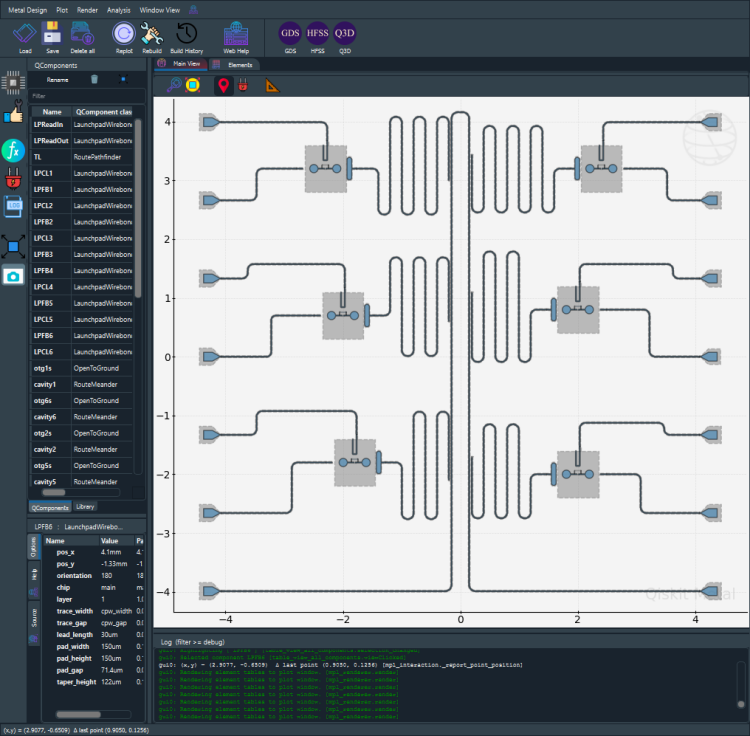

In [33]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [76]:
gui.main_window.close()

True

## Ansys QRenderer
How to Render a Metal Design into Ansys

!!!Make sure the programm is ready completly.

In [28]:
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
QAnsysRenderer.default_options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [29]:
hfss.open_ansys()

In [30]:
hfss.connect_ansys()

INFO 04:33PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:33PM [load_ansys_project]: 	Opened Ansys App
INFO 04:33PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 04:33PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project17
INFO 04:33PM [connect_design]: No active design found (or error getting active design).
INFO 04:33PM [connect]: 	 Connected to project "Project17". No design detected


In [36]:
hfss.activate_eigenmode_design("Q1")

05:17PM 34s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
INFO 05:17PM [connect_design]: 	Opened active design
	Design:    Q1 [Solution type: Eigenmode]


In [37]:
hfss.render_design(['Q1'], [('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'readout_line')])
#

In [41]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 15
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 05:20PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


05:21PM 32s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


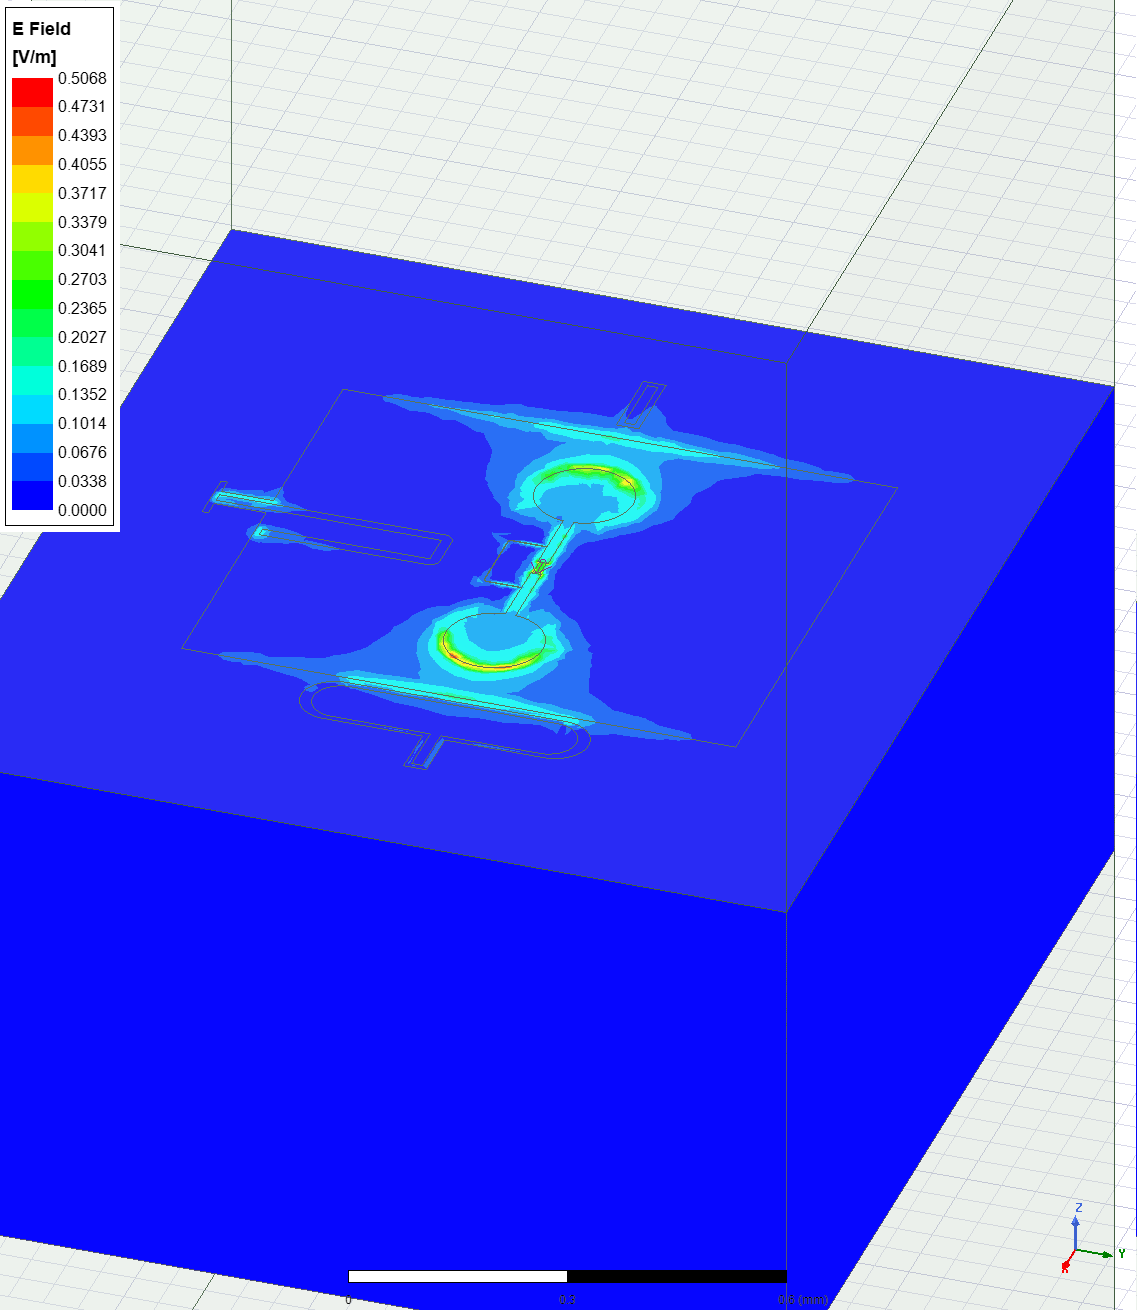

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/Fluxonuim/ansys.png')

In [42]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [43]:
hfss.epr_get_frequencies()

Design "Q1" info:
	# eigenmodes    1
	# variations    2


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,46.501915,inf
1,0,46.501915,inf


In [27]:
hfss.activate_eigenmode_design("cavity2")

03:31PM 48s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:31PM 48s WARNING [activate_ansys_design]: The design_name=cavity2 was not in active project.  Designs in active project are: 
['FluxoniumPocket_hfss', 'cavity1', 'cavity1-2'].  A new design will be added to the project.  
INFO 03:31PM [connect_design]: 	Opened active design
	Design:    cavity2 [Solution type: Eigenmode]
WARNING 03:31PM [connect_setup]: 	No design setup detected.
WARNING 03:31PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:31PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [28]:
hfss.render_design(['cavity2'], [('cavity2', 'end'), ('cavity2', 'start')])

In [29]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:32PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


In [30]:
hfss.epr_get_frequencies()

Design "cavity2" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,6.152983,inf


In [31]:
hfss.activate_eigenmode_design("cavity3")

03:39PM 39s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:39PM 39s WARNING [activate_ansys_design]: The design_name=cavity3 was not in active project.  Designs in active project are: 
['FluxoniumPocket_hfss', 'cavity1', 'cavity1-2', 'cavity2'].  A new design will be added to the project.  
INFO 03:39PM [connect_design]: 	Opened active design
	Design:    cavity3 [Solution type: Eigenmode]
WARNING 03:39PM [connect_setup]: 	No design setup detected.
WARNING 03:39PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:39PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [32]:
hfss.render_design(['cavity3'], [('cavity3', 'end'), ('cavity3', 'start')])

In [33]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:40PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:41PM 22s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


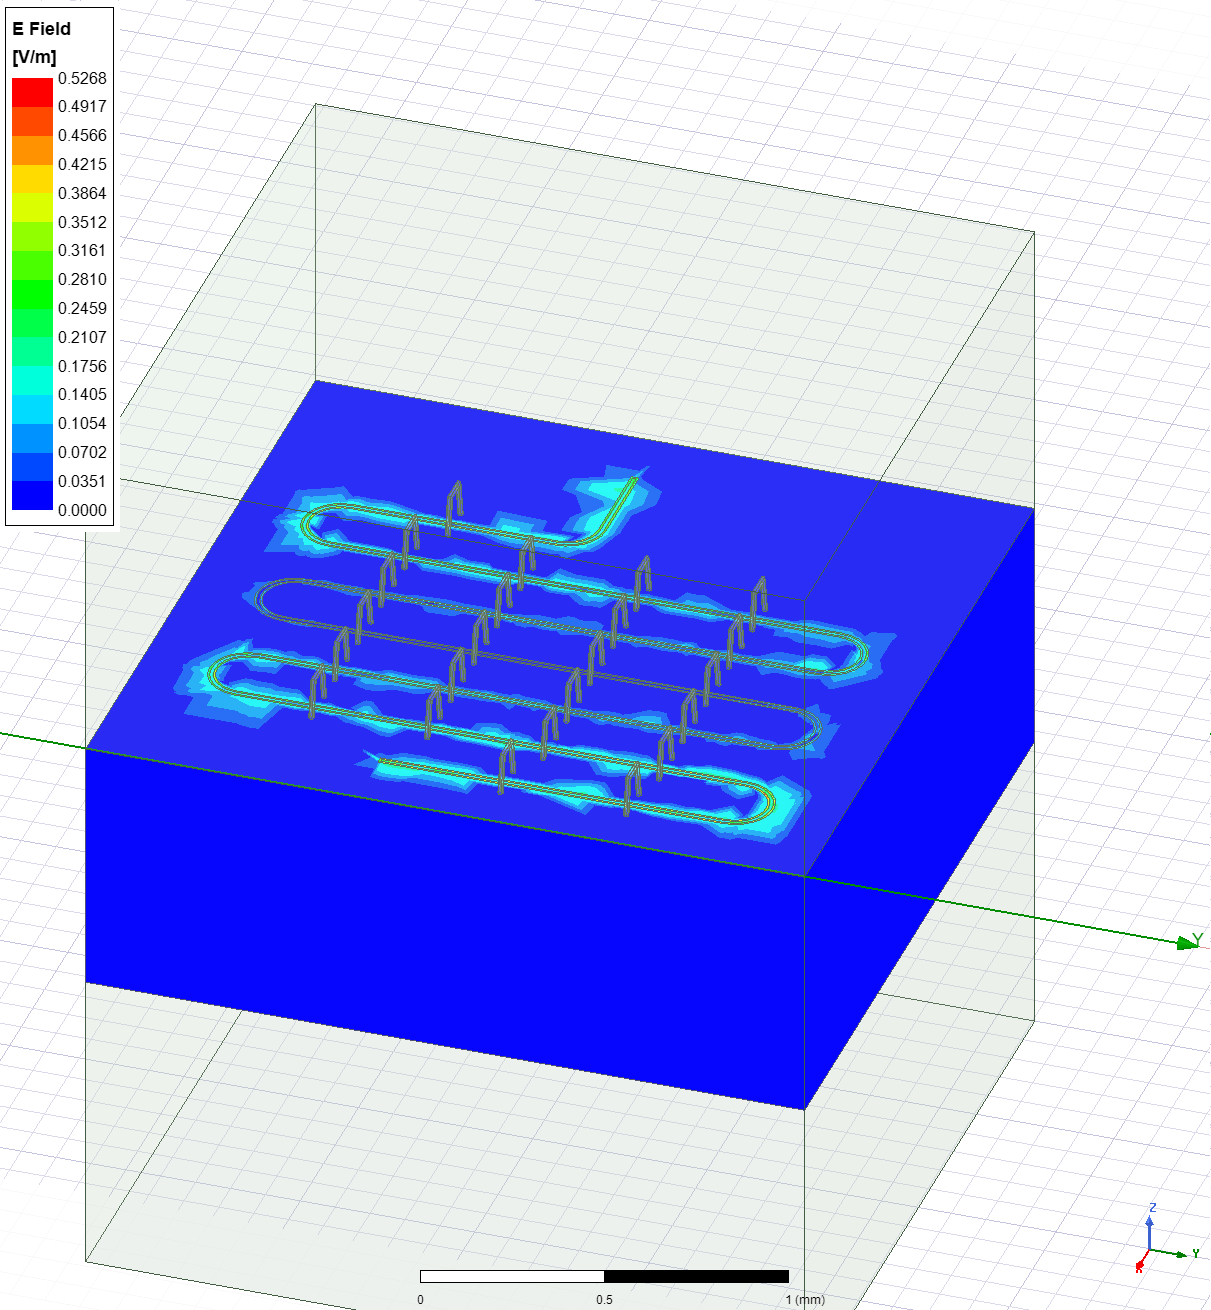

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [34]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [35]:
hfss.epr_get_frequencies()

Design "cavity3" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,4.892807,inf


In [36]:
hfss.activate_eigenmode_design("cavity4")

03:41PM 41s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:41PM 41s WARNING [activate_ansys_design]: The design_name=cavity4 was not in active project.  Designs in active project are: 
['FluxoniumPocket_hfss', 'cavity1', 'cavity1-2', 'cavity2', 'cavity3'].  A new design will be added to the project.  
INFO 03:41PM [connect_design]: 	Opened active design
	Design:    cavity4 [Solution type: Eigenmode]
WARNING 03:41PM [connect_setup]: 	No design setup detected.
WARNING 03:41PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:41PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [37]:
hfss.render_design(['cavity4'], [('cavity4', 'end'), ('cavity4', 'start')])

In [38]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:42PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:47PM 05s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


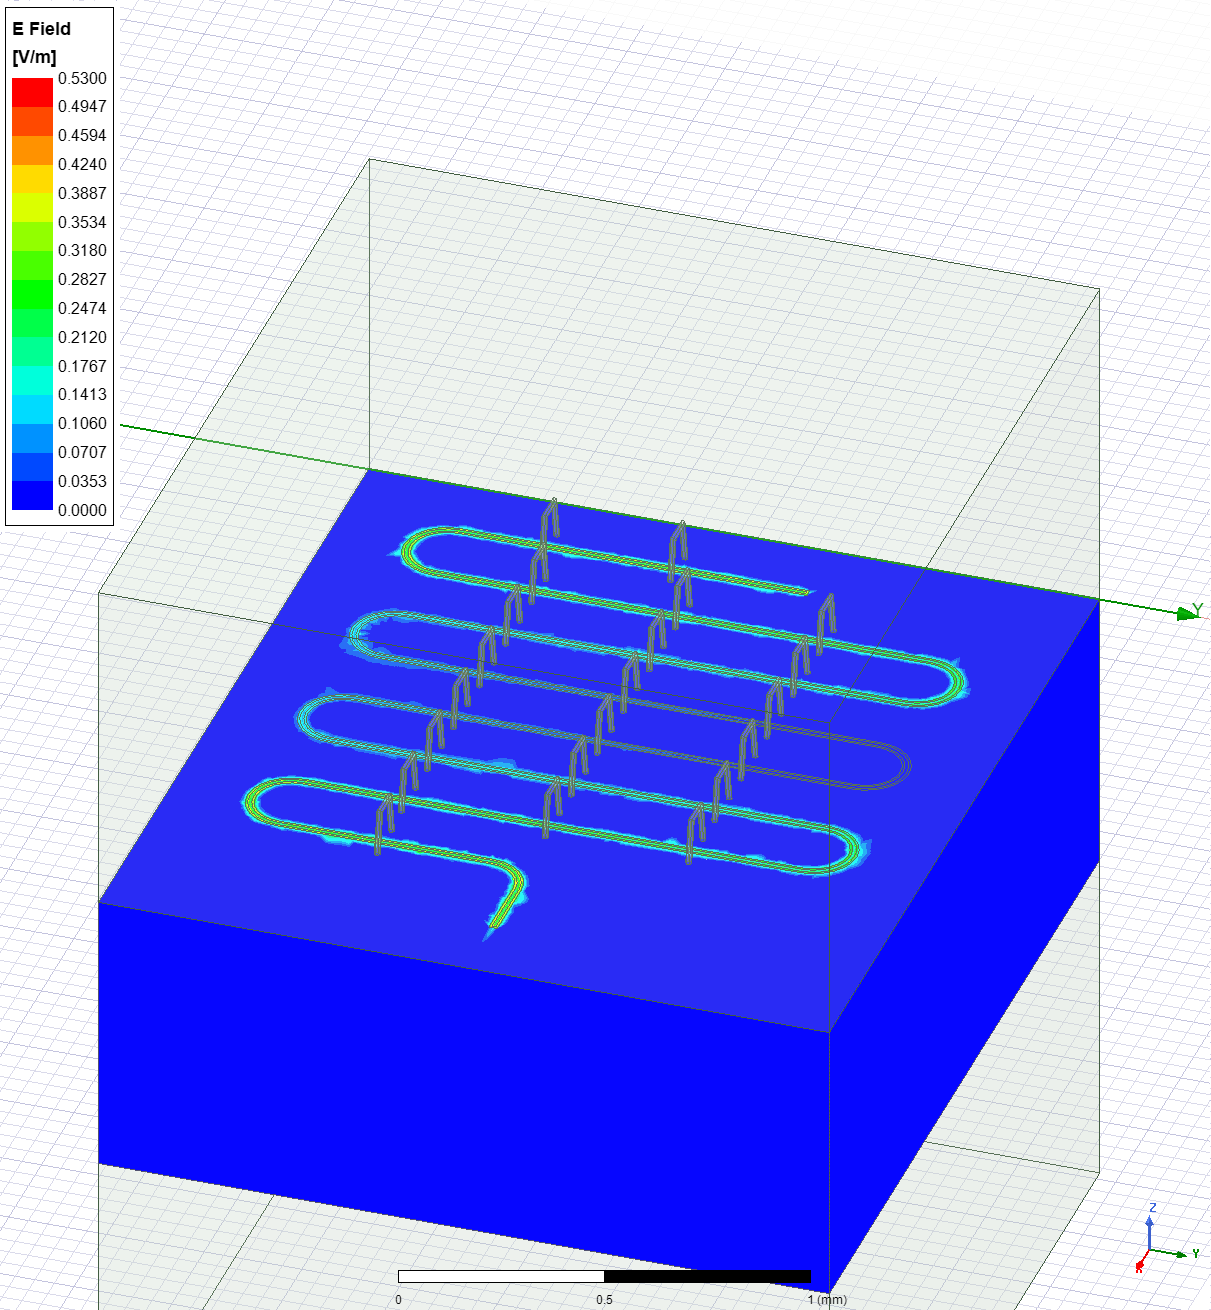

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [39]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [40]:
hfss.epr_get_frequencies()

Design "cavity4" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,5.168042,inf


In [41]:
hfss.activate_eigenmode_design("cavity5")

03:47PM 24s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:47PM 24s WARNING [activate_ansys_design]: The design_name=cavity5 was not in active project.  Designs in active project are: 
['FluxoniumPocket_hfss', 'cavity1', 'cavity1-2', 'cavity4', 'cavity2', 'cavity3'].  A new design will be added to the project.  
INFO 03:47PM [connect_design]: 	Opened active design
	Design:    cavity5 [Solution type: Eigenmode]
WARNING 03:47PM [connect_setup]: 	No design setup detected.
WARNING 03:47PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:47PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [42]:
hfss.render_design(['cavity5'], [('cavity5', 'end'), ('cavity5', 'start')])

In [43]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:47PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:52PM 21s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


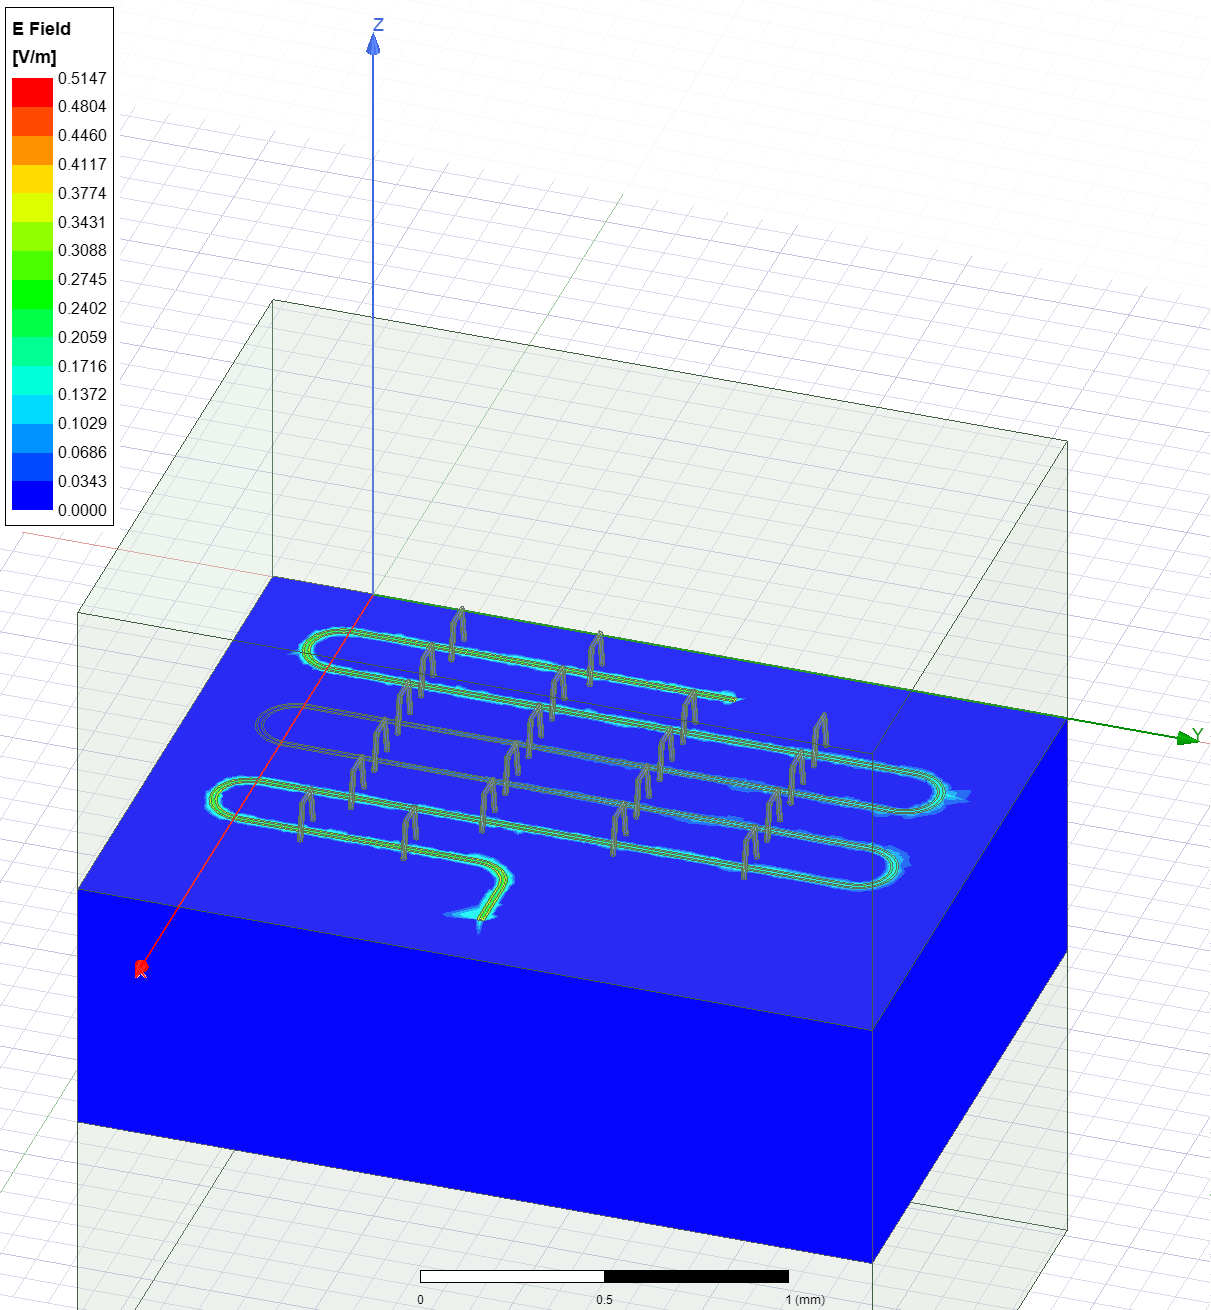

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [44]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [45]:
hfss.epr_get_frequencies()

Design "cavity5" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,5.677022,inf


In [46]:
hfss.activate_eigenmode_design("cavity6")

03:52PM 31s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:52PM 31s WARNING [activate_ansys_design]: The design_name=cavity6 was not in active project.  Designs in active project are: 
['FluxoniumPocket_hfss', 'cavity1', 'cavity1-2', 'cavity4', 'cavity2', 'cavity3', 'cavity5'].  A new design will be added to the project.  
INFO 03:52PM [connect_design]: 	Opened active design
	Design:    cavity6 [Solution type: Eigenmode]
WARNING 03:52PM [connect_setup]: 	No design setup detected.
WARNING 03:52PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:52PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [47]:
hfss.render_design(['cavity6'], [('cavity6', 'end'), ('cavity6', 'start')])

In [48]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:52PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:54PM 35s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


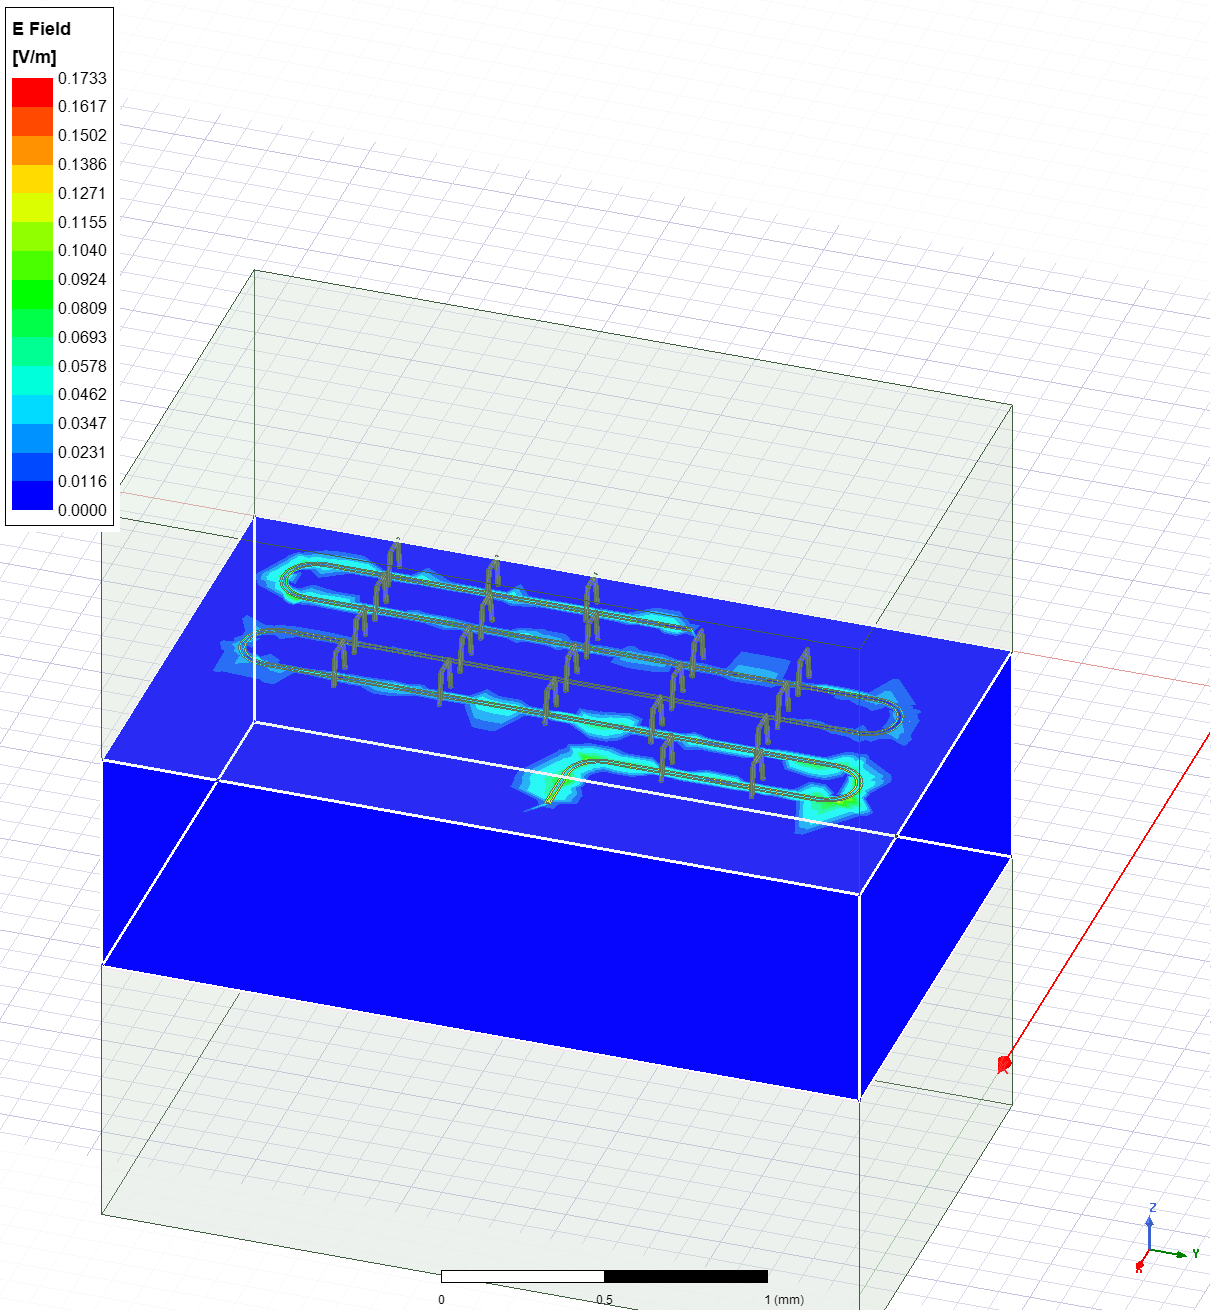

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [49]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [50]:
hfss.epr_get_frequencies()

Design "cavity6" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,5.992381,inf


In [78]:
QAnsysRenderer.get_template_options(design)

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [126]:
QAnsysRenderer.default_setup

{'drivenmodal': {'name': 'Setup',
  'freq_ghz': '5.0',
  'max_delta_s': '0.1',
  'max_passes': '10',
  'min_passes': '1',
  'min_converged': '1',
  'pct_refinement': '30',
  'basis_order': '1'},
 'eigenmode': {'name': 'Setup',
  'min_freq_ghz': '1',
  'n_modes': '1',
  'max_delta_f': '0.5',
  'max_passes': '10',
  'min_passes': '1',
  'min_converged': '1',
  'pct_refinement': '30',
  'basis_order': '-1'},
 'q3d': {'name': 'Setup',
  'freq_ghz': '5.0',
  'save_fields': 'False',
  'enabled': 'True',
  'max_passes': '15',
  'min_passes': '2',
  'min_converged_passes': '2',
  'percent_error': '0.5',
  'percent_refinement': '30',
  'auto_increase_solution_order': 'True',
  'solution_order': 'High',
  'solver_type': 'Iterative'},
 'port_inductor_gap': '10um'}

In [44]:
hfss.disconnect_ansys()

In [35]:
hfss.clean_active_design()

In [8]:
hfss.activate_eigenmode_design("allchip")

06:44PM 55s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
INFO 06:44PM [connect_design]: 	Opened active design
	Design:    allchip [Solution type: Eigenmode]


In [81]:
hfss.options['x_buffer_width_mm'] = 0.9
hfss.options['y_buffer_width_mm'] = 0.9
hfss.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.9,
 'y_buffer_width_mm': 0.9,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [9]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,7,rect_jj,"LINESTRING (-1.81500 -1.80000, -1.78500 -1.80000)",1,False,False,main,0.01,16.35nH,0,0,0.000007,10nH,0,0,0.000007,FakeJunction_01
1,8,rect_jj,"LINESTRING (1.78500 -1.80000, 1.81500 -1.80000)",1,False,False,main,0.01,16.35nH,0,0,0.000007,10nH,0,0,0.000007,FakeJunction_06
2,9,rect_jj,"LINESTRING (-1.98500 0.70000, -2.01500 0.70000)",1,False,False,main,0.01,16.35nH,0,0,0.000007,10nH,0,0,0.000007,FakeJunction_02
3,10,rect_jj,"LINESTRING (2.01500 0.80000, 1.98500 0.80000)",1,False,False,main,0.01,16.35nH,0,0,0.000007,10nH,0,0,0.000007,FakeJunction_05
4,11,rect_jj,"LINESTRING (-2.28500 3.20000, -2.31500 3.20000)",1,False,False,main,0.01,16.35nH,0,0,0.000007,10nH,0,0,0.000007,FakeJunction_03
5,12,rect_jj,"LINESTRING (2.41500 3.20000, 2.38500 3.20000)",1,False,False,main,0.01,16.35nH,0,0,0.000007,10nH,0,0,0.000007,FakeJunction_04


In [10]:
hfss.render_design()


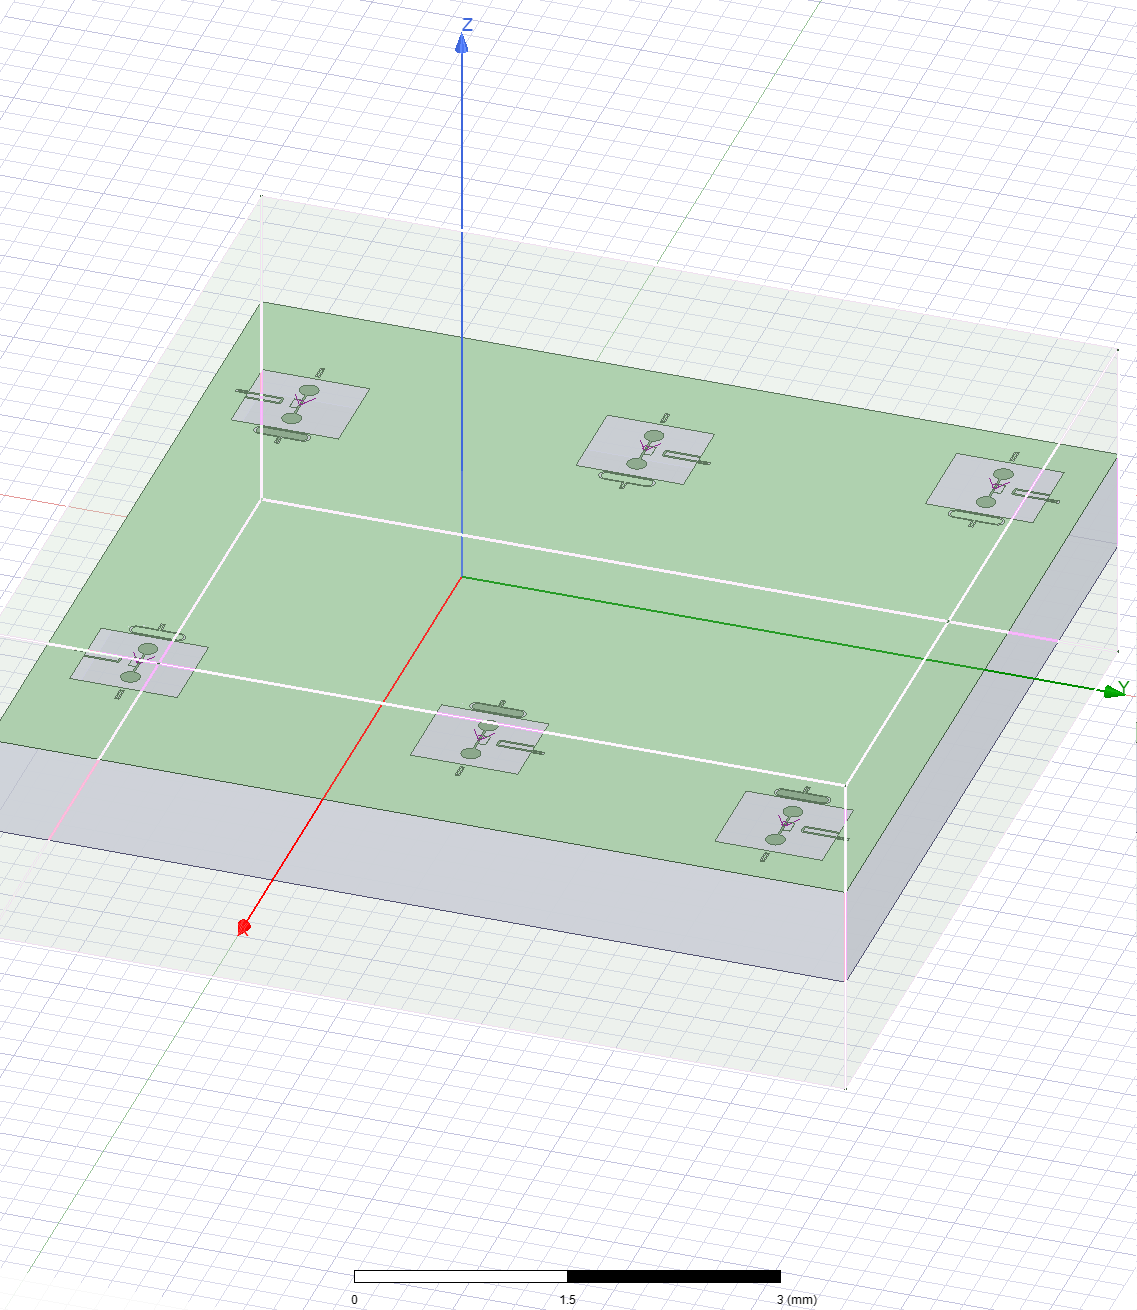

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/Fluxonuim/ansys.png')

In [11]:
hfss.save_screenshot()

In [12]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
#setup.delta_f = 0.05
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '16.35 nH')
pinfo.design.set_variable('Cj', '11.25 fF')
setup.analyze()

hfss.plot_convergences()

INFO 06:48PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


07:08PM 44s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


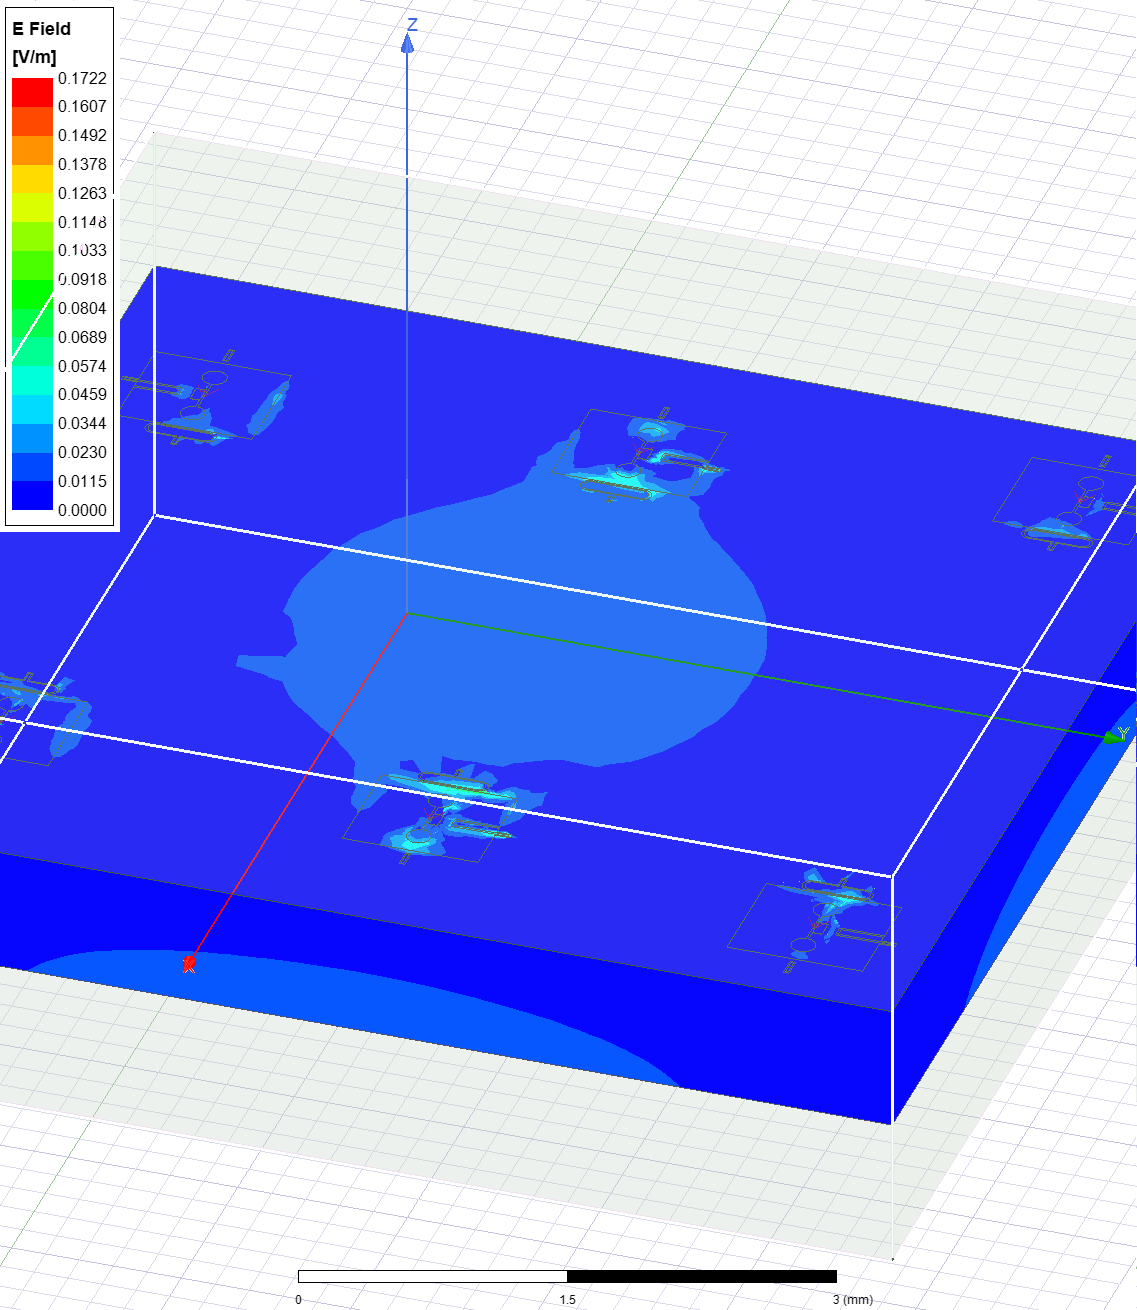

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/Fluxonuim/ansys.png')

In [13]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [14]:
hfss.plot_ansys_delete(['Mag_E1'])

07:09PM 13s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [15]:
hfss.set_mode(2, "Setup")

INFO 07:09PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


07:09PM 23s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


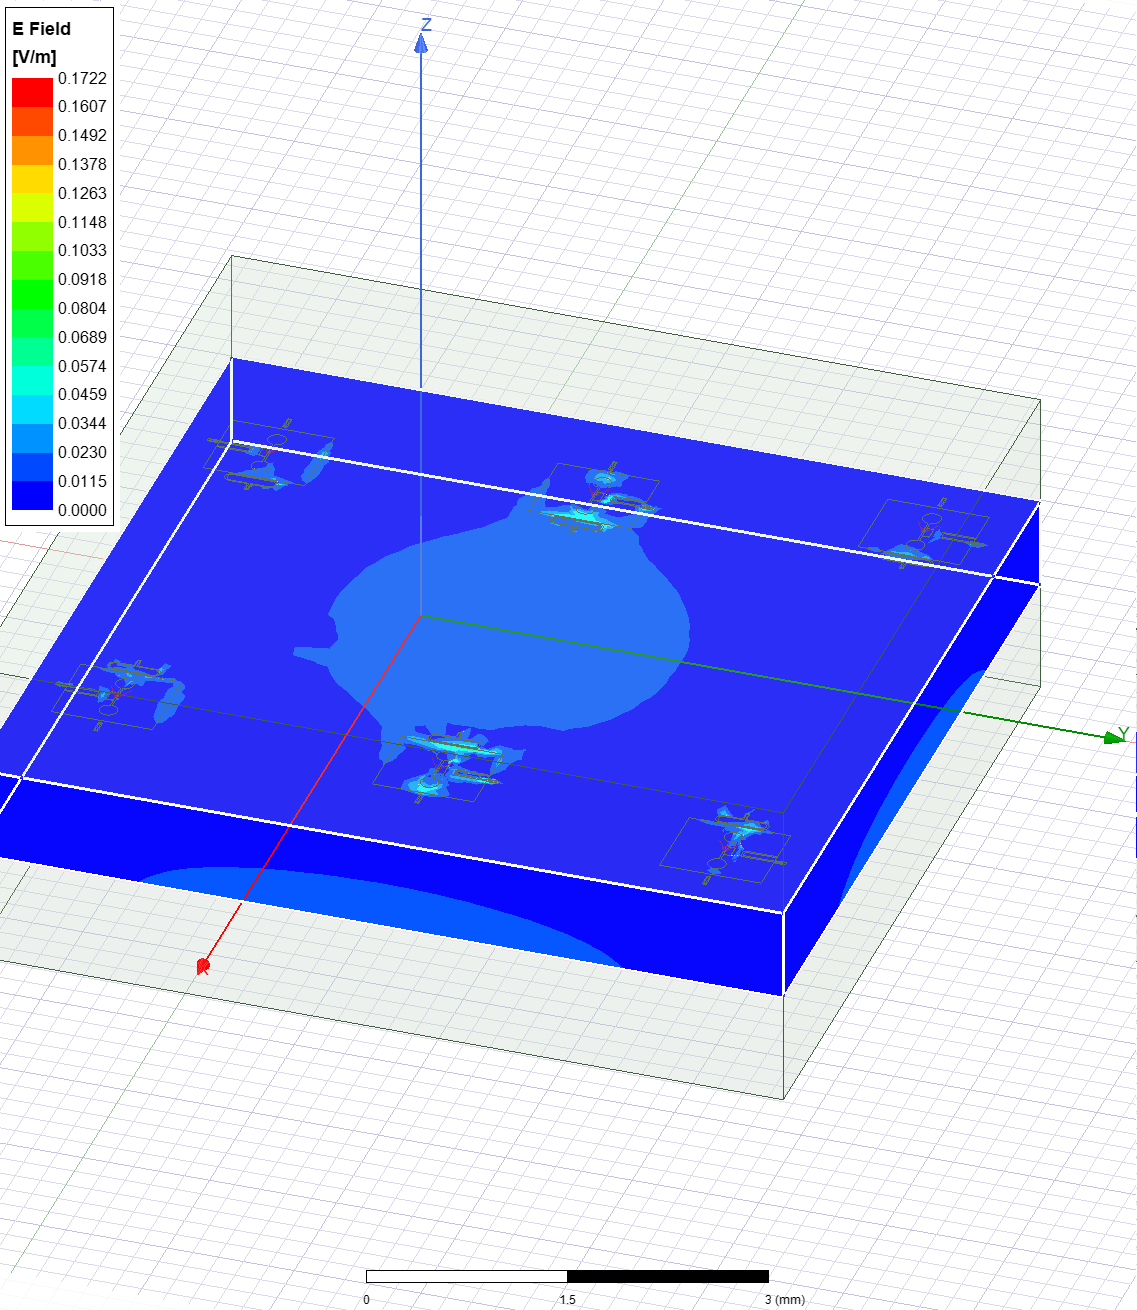

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/Fluxonuim/ansys.png')

In [16]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [23]:
hfss.plot_ansys_delete(['Mag_E1'])

07:10PM 14s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [24]:
hfss.set_mode(3, "Setup")

INFO 07:10PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
07:10PM 15s WARNING [set_mode]: The requested mode=3 is not a valid (1 to 2) selection. The mode was not set.


In [25]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')

07:10PM 16s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


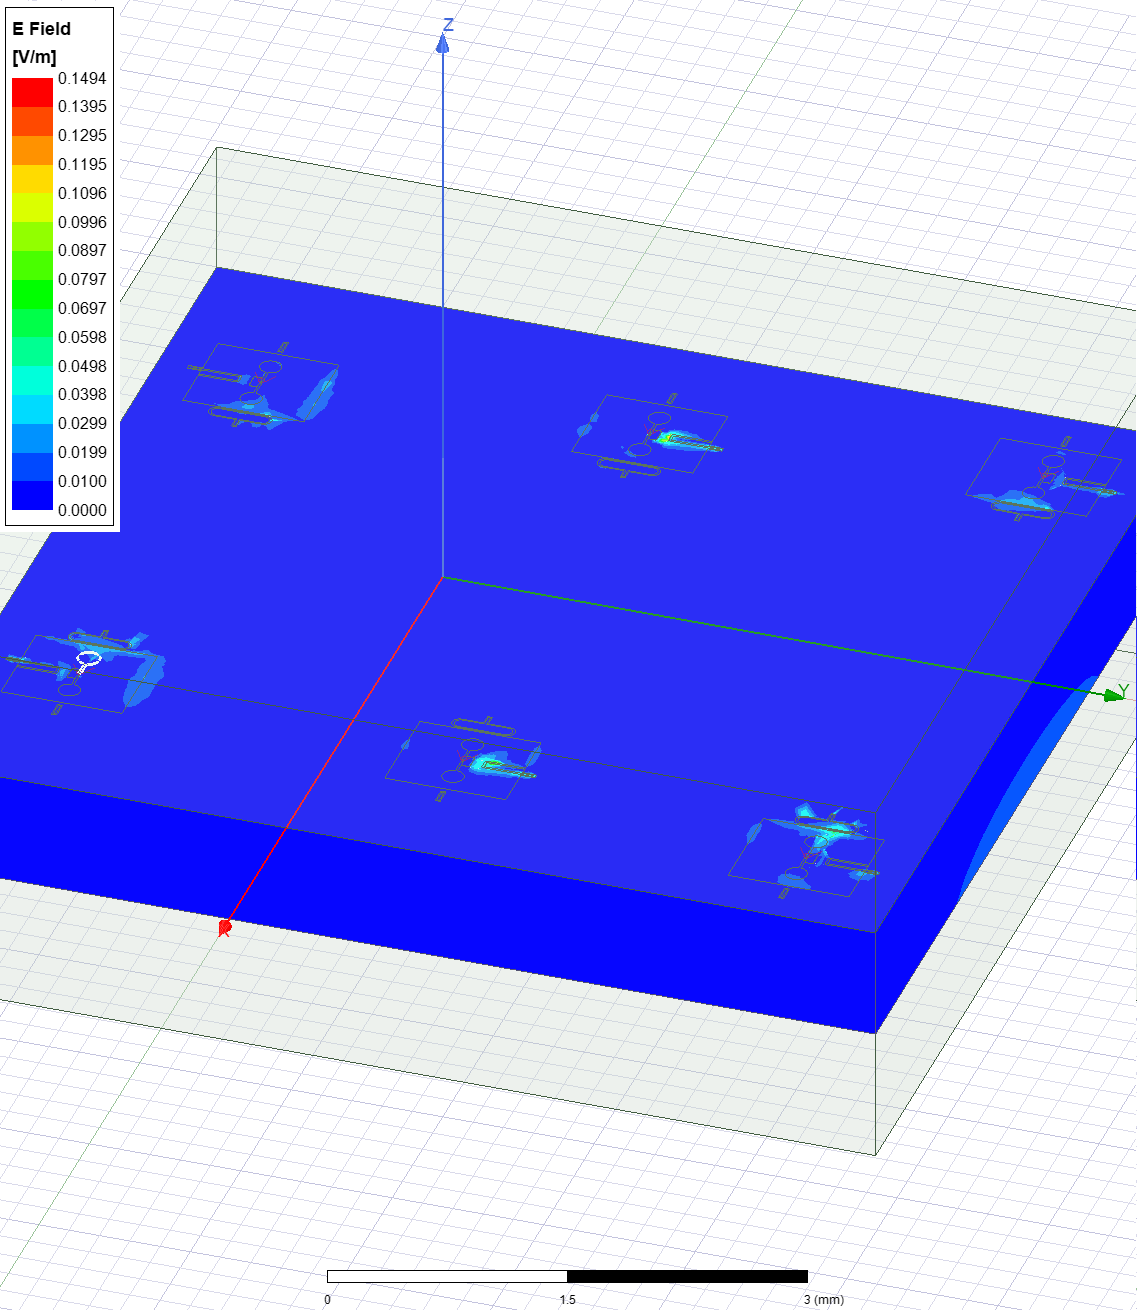

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/Fluxonuim/ansys.png')

In [26]:
hfss.save_screenshot()

In [27]:
hfss.plot_ansys_delete(['Mag_E1'])

07:10PM 26s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


### Set up EPR parameters
Specify the junctions in the model; in this case there's only one, namely 'jj'.

In [28]:
#Non-linear (Josephson) junction
pinfo = hfss.pinfo # Project info
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify
# Handles  microwave analysis on eigenmode solutions
eprd = epr.DistributedAnalysis(pinfo)

Design "allchip" info:
	# eigenmodes    2
	# variations    1


In [29]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag_all       = {ℰ_mag}
ℰ_mag % of ℰ_elec_all  = {ℰ_mag / ℰ_elec * 100 :.1f}%
""")


ℰ_elec_all       = 1.64127451296587e-22
ℰ_elec_substrate = 1.23261402713807e-22
EPR of substrate = 75.1%

ℰ_mag_all       = 1.64127008728891e-22
ℰ_mag % of ℰ_elec_all  = 100.0%



### Run EPR analysis

Perform EPR analysis for all modes and variations. Here, Quantum Analysis starts.

In [30]:
eprd.do_EPR_analysis()

# 4a. Perform Hamiltonian spectrum post-analysis, building on mw solutions using EPR
epra = epr.QuantumAnalysis(eprd.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

# 4b. Report solved results
swp_variable = 'Lj' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)


Variation 0  [1/1]

  Mode 0 at 22.22 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  4.039e-22 4.039e-22

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 61.08%
	jj              3.71393e-09  (+)        2.36622e-09
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.4439096486044455

  Mode 1 at 28.67 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  8.206e-23 8.206e-23

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 48.51%
	jj              3.53964e-08  (+)        3.75675e-08
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdi

  df = df.drop('Unnamed: 9', 1)

  df = pd.read_csv(io.StringIO(text2[3].strip()),



p_dielectric_main_1 = 0.7510102773183696


WARNING 07:11PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project16\allchip\2022-02-04 19-10-39.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    49.151939
1    39.120579
dtype: float64

Pm_norm idx =
      jj
0  False
1  False
*** P (participation matrix, not normlz.)
             jj
0  3.713933e-09
1  3.539640e-08

*** S (sign-bit matrix)
   s_jj
0     1
1     1
*** P (participation matrix, normalized.)
   3.7e-09
   3.5e-08

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  8.51e-14 2.09e-12
  2.09e-12 1.29e-11

*** Chi matrix ND (MHz) 
        -0       -0
        -0       -0

*** Frequencies O1 PT (MHz)
0    22215.543340
1    28672.989059
dtype: float64

*** Frequencies ND (MHz)
0    22215.543341
1    28672.989059
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


ValueError: Data has no positive values, and therefore can not be log-scaled.

Traceback (most recent call last):
  File "C:\Users\figenyilmaz\Anaconda3\envs\qiskit-metal\lib\site-packages\matplotlib\backends\backend_qt.py", line 455, in _draw_idle
    self.draw()
  File "C:\Users\figenyilmaz\Anaconda3\envs\qiskit-metal\lib\site-packages\matplotlib\backends\backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\figenyilmaz\Anaconda3\envs\qiskit-metal\lib\site-packages\matplotlib\artist.py", line 73, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "C:\Users\figenyilmaz\Anaconda3\envs\qiskit-metal\lib\site-packages\matplotlib\artist.py", line 50, in draw_wrapper
    return draw(artist, renderer)
  File "C:\Users\figenyilmaz\Anaconda3\envs\qiskit-metal\lib\site-packages\matplotlib\figure.py", line 2803, in draw
    mimage._draw_list_compositing_images(
  File "C:\Users\figenyilmaz\Anaconda3\envs\qiskit-metal\lib\site-packages\matplotlib\image.py", line 132, in _draw_list_compositing_images
    a.draw(rende

In [104]:
eprd.get_ansys_frequencies_all()

Freq. (GHz)  Quality Factor
variation mode                             
0         0        2.337676             inf
          1        4.250831             inf
1         0        2.332005             inf
          1        4.116222             inf

In [3]:
??eprd.get_Qseam

Object `eprd.get_Qseam` not found.


In [95]:
eprd.get_Qsurface_all(1, '0')

Calculating Qsurface for mode 1 (1/1)
p_surf_1 = 3.7289193182809e-05


Qsurf_1    2.681742e+07
dtype: float64

In [105]:
eprd.get_Qsurface_all(0, '0')

Calculating Qsurface for mode 0 (0/1)
p_surf_0 = 3.7289193182809e-05


Qsurf_0    2.681742e+07
dtype: float64

In [169]:
eprd.get_Qseam(0, '0')

TypeError: get_Qseam() missing 1 required positional argument: 'variation'

In [96]:
eprd.get_variations()

OrderedDict([('0', "Cj='0fF' Lj='10nH'")])

In [145]:
??eprd.get_variations

In [4]:
??pyEPR

Object `pyEPR` not found.


In [94]:
??eprd.calc_avg_current_J_surf_mag

In [99]:
eprd.calc_avg_current_J_surf_mag('0', j_rect, 0)

NameError: name 'j_rect' is not defined

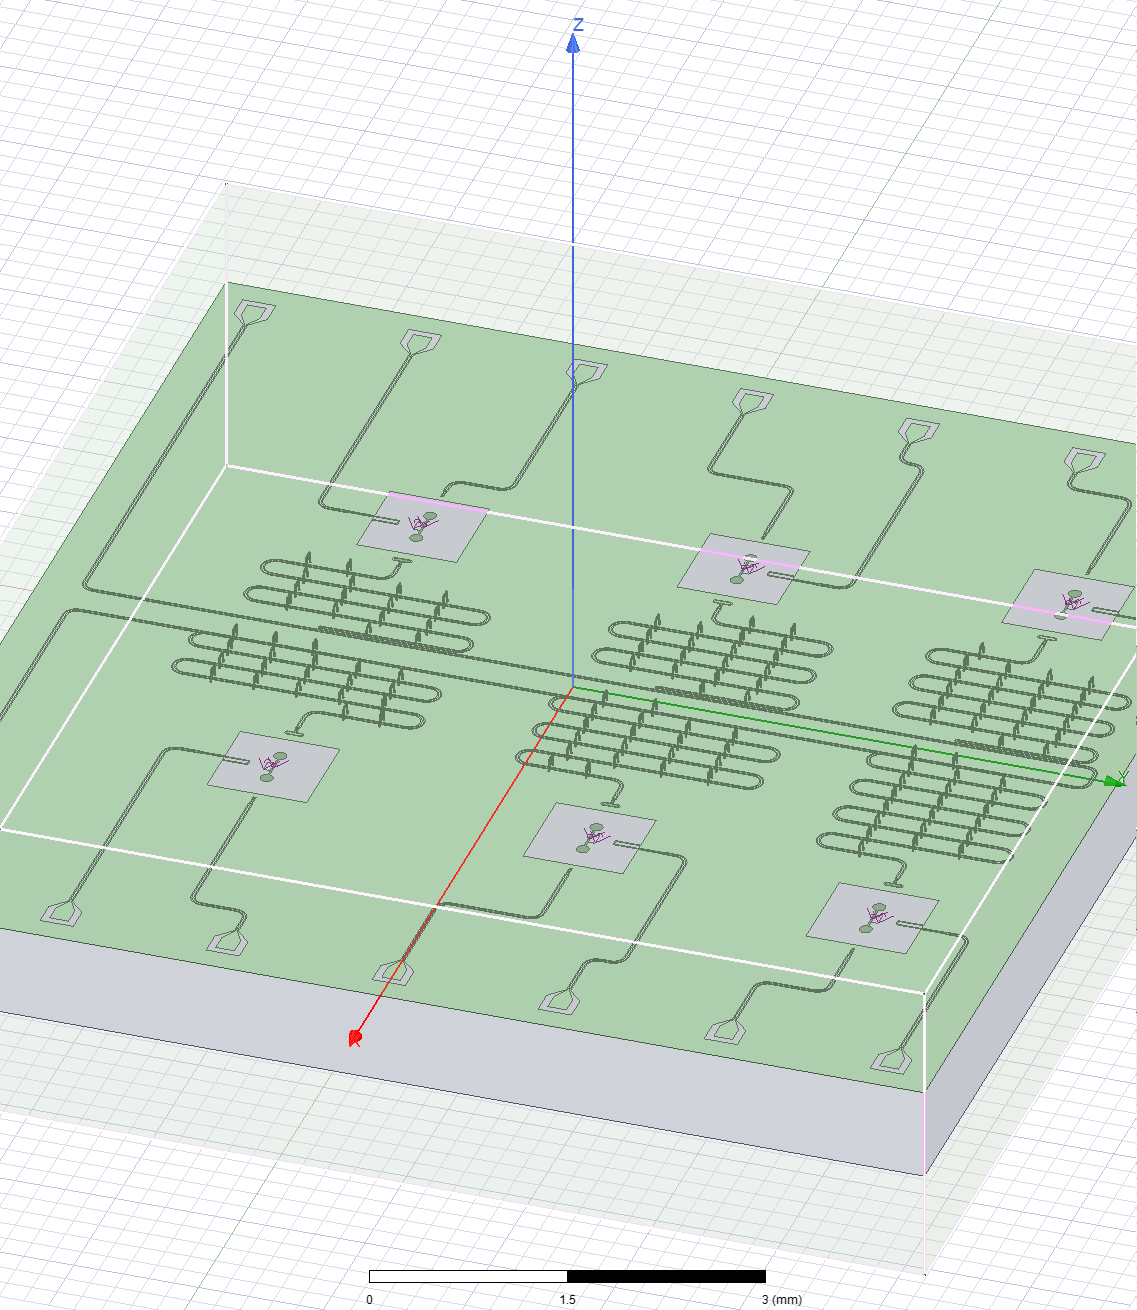

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [146]:
hfss.save_screenshot()

In [20]:
hfss.disconnect_ansys()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


Next we will look at a lumped oscillator model (LOM) for the same design.

## Render to Ansys Q3D

### Capacitance Analysis
Select the analysis you intend to run from the `qiskit_metal.analyses` collection.<br>
Select the design to analyze and the tool to use for any external simulation

In [107]:
c1 = LOManalysis(design, "q3d")

In [108]:
# example: update single setting
c1.sim.setup.max_passes = 6
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 6,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [109]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 07:22PM [connect_project]: Connecting to Ansys Desktop API...
INFO 07:22PM [load_ansys_project]: 	Opened Ansys App
INFO 07:22PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 07:22PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project13
INFO 07:22PM [connect_design]: 	Opened active design
	Design:    allchip [Solution type: Eigenmode]
INFO 07:22PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 07:22PM [connect]: 	Connected to project "Project13" and design "allchip" 😀 

INFO 07:23PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 07:23PM [connect_setup]: 	No design setup detected.
WARNING 07:23PM [connect_setup]: 	Creating Q3D default setup.
INFO 07:23PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 07:23PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 07:23PM [analyze]

,charge_line_Q1,flux_bias_line_Q1,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,26.29273,-25.88866,-0.24855,-0.04497,-0.01279
flux_bias_line_Q1,-25.88866,264.76851,-36.55126,-34.49300,-89.37465
pad_bot_Q1,-0.24855,-36.55126,43.29169,-4.38473,-0.42418
pad_top_Q1,-0.04497,-34.49300,-4.38473,43.29429,-2.68054
readout_padNline_Q1,-0.01279,-89.37465,-0.42418,-2.68054,93.47221


##### Selecting a design previously created

If you created a design with the above commands, it will be automatically selected and linked to this jupyter notebook session. Instead, if you want to use a design that had been created beforehand in the project, you can select it by following one of following three approaches:
* manually activating the design from the Ansys GUI, **before** you run the `fourq_hfss.start()` command. In the Ansys GUI, you will find the list of designs in the leftmost panel, and you can activate them with a double click.
* using method `fourq_q3d.connect_ansys(*with parameters*)`, specifying which design to connect to.
* using method `fourq_q3d.activate_ansys_design('name')`.

The next two cells exemplify how to use the last method. The first of the two cells below will create a new design because the name does not corrispond to any design in the project. The second cell will return to the previously created design.

NOTE: this method will also create a design with the given name if the design name is not found, to be able to create a new design it will need to be given the solution type, for example: `fourq_hfss.activate_ansys_design("newEigen", 'eigenmode')`. Failure to specify the type will result in an error message asking to specify the the `solution_type` parameter.

In [110]:
# c1.setup.run    <- direct access
c1.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': None, 'components': ['Q1'], 'open_terminations': [('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'readout_line')], 'box_plus_buffer': True}



In [120]:
c1.sim.setup.freq_ghz = 4.8
c1.sim.run()
c1.sim.capacitance_matrix

INFO 03:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:14PM [analyze]: Analyzing setup Setup
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmpy4bhime9.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmpgq941smx.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 1, False
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmppr9tnoyk.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 2, False
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData\Local\Temp\tmpzeksw4jo.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4800000000, Maxwell, 3, False
INFO 03:15PM [get_matrix]: Exporting matrix data to (C:\Users\METAL\AppData

,fl1_connector_pad_Q1,pad_bot_Q1,pad_top_Q1,ro1_connector_pad_Q1
fl1_connector_pad_Q1,289.08665,-93.20523,-94.70723,-23.54866
pad_bot_Q1,-93.20523,158.45826,-58.94090,-0.96581
pad_top_Q1,-94.70723,-58.94090,173.10867,-12.65251
ro1_connector_pad_Q1,-23.54866,-0.96581,-12.65251,37.38939


In [121]:
type(c1.sim.capacitance_matrix)

pandas.core.frame.DataFrame

### Lumped oscillator model (LOM)

Using capacitance matrices obtained from each pass, save the many parameters of the Hamiltonian of the system. `get_lumped_oscillator()` operates on 4 setup parameters: <br><br>
Lj: float <br>
Cj: float <br>
fr: Union[list, float] <br>
fb: Union[list, float] <br>

In [155]:
c1.setup.junctions = Dict({'Lj': 12.31, 'Cj': 2})
c1.setup.freq_readout = 7.0
c1.setup.freq_bus = [5.0]

c1.run_lom()
c1.lumped_oscillator_all

ValueError: Capacitance matrix is not the right size

Using capacitance matrices obtained from each pass, save the many parameters of the Hamiltonian of the system. lumped_oscillator_vs_passes takes in the following parameters: <br><br>
Lj_nH: float <br>
Cj_fF: float <br>
N: int <br>
fr: Union[list, float] <br>
fb: Union[list, float] <br>
maxPass: int <br>
variation: str = '' <br>
solution_kind: str = 'AdaptivePass' <br>
g_scale: float = 1

Here,<br>
Lj - the Josephson inductance of your Josephson junction <br>
Cj - the capacitance of your Josephson junction<br>
N - the total number of connection pads <br>
fr - the frequency of the readout resonator <br>
[fb1, fb2, fb3...., fbN-1] - list of the frequencies of the busses<br>
passes - the number of passes your simulation ran for

In [125]:
c1.plot_convergence();
c1.plot_convergence_chi()

INFO 03:37PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Design_q3d" info:
	# eigenmodes    0
	# variations    1


INFO 03:37PM [__del__]: Disconnected from Ansys HFSS


In [111]:
c1.sim.close()

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


In [56]:
q3d.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400mm',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [157]:
q3d.disconnect_ansys()

In [158]:
gui.main_window.close()

True

 # CPW Kappa Calculation

In [1]:
# Import the function "kappa_in" from the file kappa_calculation.py 
from qiskit_metal.analyses.em.kappa_calculation import kappa_in

In [2]:
# SANITY CHECK #1 
# Let's check that output is only given for three and six arguments  
print("Output for N=1 Args:", kappa_in(1.0))
print("Output for N=2 Args:", kappa_in(1.0, 1.0))
print("Output for N=3 Args:", kappa_in(1.0, 1.0, 1.0))
print("Output for N=4 Args:", kappa_in(1.0, 1.0, 1.0, 1.0))
print("Output for N=5 Args:", kappa_in(1.0, 1.0, 1.0, 1.0, 1.0))
print("Output for N=6 Args:", kappa_in(1.0, 1.0, 1.0, 1.0, 1.0, 1.0))
print("Output for N=7 Args:", kappa_in(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))

Output for N=1 Args: None
Output for N=2 Args: None
Output for N=3 Args: 1591.5494309189535
Output for N=4 Args: None
Output for N=5 Args: None
Output for N=6 Args: 3393.346709322837
Output for N=7 Args: None


In [3]:
# SANITY CHECK #2
# Let's check that the magnitude of the output is what we would expect for 3 arguments:
# Input #1: omega = 5GHz = 5E9 Hertz 
# Input #2: C_in = 30fF = 30E-15 Farads 
# Input #3: omega_n = 4GHz = 4.5E9 Hertz 
print("Calculated kappa (in Hz):", kappa_in(5.0E9, 30.0E-15, 4.5E9), "Hz")
print("Calculated kappa (in MHz):", kappa_in(5.0E9, 30.0E-15, 4.5E9)/1.0E6, "MHz")

Calculated kappa (in Hz): 161144.37988054403 Hz
Calculated kappa (in MHz): 0.16114437988054403 MHz
